In [134]:
import pandas as pd 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import numpy as np 

In [135]:
df = pd.read_csv('/Users/yudahendriawan/Library/Mobile Documents/com~apple~CloudDocs/Dicoding/Belajar Pengembangan Machine Learning/datasets/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [137]:
df = df.drop(columns='Id')

In [138]:
# for the dtype, the default is boolean making it compatible with the tensorflow
# so need to convert it to np.float32 before

category = pd.get_dummies(df.Species, dtype=np.float32)
category

,Iris-setosa,Iris-versicolor,Iris-virginica
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
...,...,...,...
145,0.0,0.0,1.0
146,0.0,0.0,1.0
147,0.0,0.0,1.0
148,0.0,0.0,1.0


In [139]:
new_df = pd.concat([df, category], axis=1)
new_df = new_df.drop(columns='Species')
new_df 

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1.0,0.0,0.0
1,4.9,3.0,1.4,0.2,1.0,0.0,0.0
2,4.7,3.2,1.3,0.2,1.0,0.0,0.0
3,4.6,3.1,1.5,0.2,1.0,0.0,0.0
4,5.0,3.6,1.4,0.2,1.0,0.0,0.0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0.0,0.0,1.0
146,6.3,2.5,5.0,1.9,0.0,0.0,1.0
147,6.5,3.0,5.2,2.0,0.0,0.0,1.0
148,6.2,3.4,5.4,2.3,0.0,0.0,1.0


In [140]:
dataset = new_df.values
dataset

array([[5.1, 3.5, 1.4, ..., 1. , 0. , 0. ],
       [4.9, 3. , 1.4, ..., 1. , 0. , 0. ],
       [4.7, 3.2, 1.3, ..., 1. , 0. , 0. ],
       ...,
       [6.5, 3. , 5.2, ..., 0. , 0. , 1. ],
       [6.2, 3.4, 5.4, ..., 0. , 0. , 1. ],
       [5.9, 3. , 5.1, ..., 0. , 0. , 1. ]])

In [141]:
X = dataset[:, 0:4]
y = dataset[:, 4:7]

In [142]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)
X_scale

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(X_scale, y, test_size=0.3)

In [144]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )


In [145]:
import tensorflow as tf 

class MyCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if (logs.get('accuracy')>0.9):
      print("\nAkurasi telah mencapai >90%!")
      self.model.stop_training = True
callbacks = MyCallback()

In [146]:

hist = model.fit(X_train, Y_train, epochs=100, callbacks=[callbacks])

Epoch 1/100


4/4 [==============================] - 0s 1ms/step - loss: 1.1315 - accuracy: 0.0190
Epoch 2/100
4/4 [==============================] - 0s 972us/step - loss: 1.0994 - accuracy: 0.2952
Epoch 3/100
4/4 [==============================] - 0s 920us/step - loss: 1.0705 - accuracy: 0.4381
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 1.0435 - accuracy: 0.6190
Epoch 5/100
4/4 [==============================] - 0s 968us/step - loss: 1.0158 - accuracy: 0.6381
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.9901 - accuracy: 0.6381
Epoch 7/100
4/4 [==============================] - 0s 913us/step - loss: 0.9641 - accuracy: 0.6381
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9357 - accuracy: 0.6476
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.9074 - accuracy: 0.6476
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.8780 - accuracy: 0.6476
Epoch 11/100
4/4 [===============

In [147]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 4ms/step - loss: 0.4344 - accuracy: 0.9556


[0.434392511844635, 0.9555555582046509]

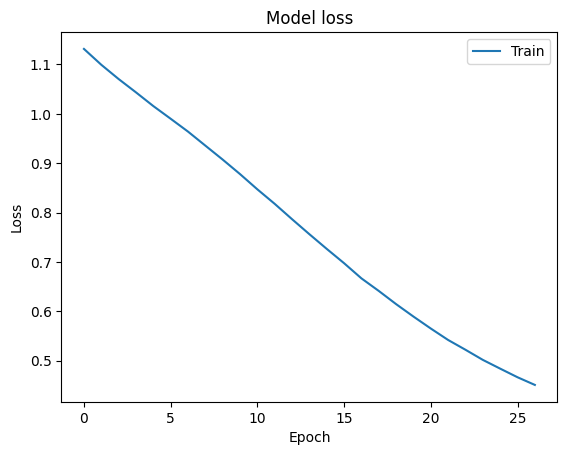

In [148]:
import matplotlib.pyplot as plt 

plt.plot(hist.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper right')
plt.show()

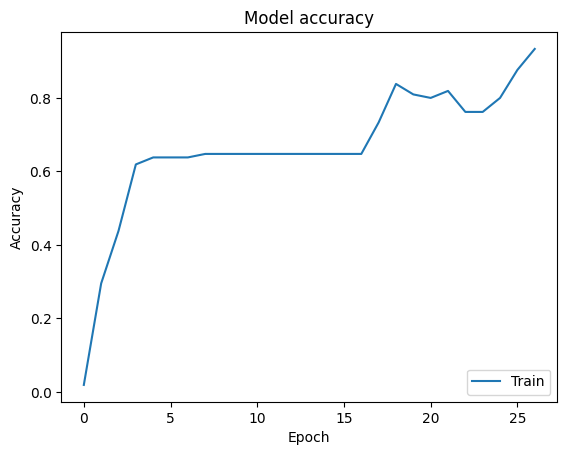

In [149]:
plt.plot(hist.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='lower right')
plt.show()
